### Student contributions

* Student `Dissanayake` has ...
* Student `Baykara` has ...

In [1]:
from IPython.display import HTML

HTML('''
<script>code_show=true; 

function code_toggle() {
    if (code_show){
    $('div.input').hide();
    } else {
    $('div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to show or hide your raw code."></form>
''')

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import os
import sys
import time

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import joblib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold, GridSearchCV, StratifiedShuffleSplit

from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,ConfusionMatrixDisplay
from keras.datasets import mnist
from sklearn.pipeline import Pipeline

## Loading Data

Notice that the shape of each pattern is given by a $32 \times 32 \times 1$ tensor. Thus, you may have to reshape it to either a matrix or a vector depending on the task you want to perform.

In [6]:
f_bnch = "mnist_32_32.bnch.joblib"
mnist = joblib.load(f_bnch)
print(mnist.keys())

print("data_shape: {0}".format(mnist['data'].shape))
print("data_test_shape: {0}".format(mnist['data_test'].shape))

dict_keys(['DESCR', 'target', 'target_test', 'data', 'data_test'])
data_shape: (60000, 1024)
data_test_shape: (10000, 1024)


In [7]:
mnist

{'DESCR': 'MNIST data set from Lecun site: http://yann.lecun.com/exdb/mnist/',
 'target': array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 'target_test': array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'data_test': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [8]:
mnist

{'DESCR': 'MNIST data set from Lecun site: http://yann.lecun.com/exdb/mnist/',
 'target': array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 'target_test': array([7, 2, 1, ..., 4, 5, 6], dtype=uint8),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'data_test': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

## Data Exploration, Visualization and Correlations

Descriptive statistics, boxplots and histograms.

### Some examples

Plot 10 randomly chosen digit images as 5 x 2 subplots.

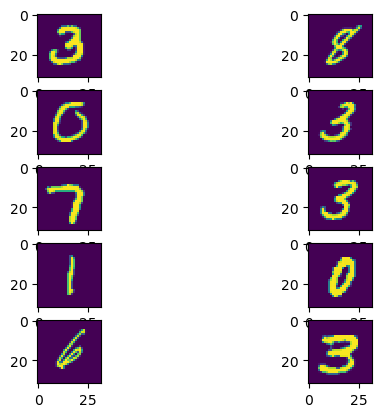

In [9]:
#code the plotting here
import random
f, axis = plt.subplots(5,2)
for i in range(5):
  rand = random.randint(0,len(mnist['data'][0]))
  rand2 = random.randint(0,len(mnist['data'][0]))

  axis[i,0].imshow(mnist['data'][rand].reshape(32,32))
  axis[i,1].imshow(mnist['data'][rand2].reshape(32,32))

plt.show()

In [10]:
mnist_reshaped = [a.reshape(32,32) for a in mnist['data']]


### Descriptive analysis

Build a DataFrame to make easier the exploratory analysis.

In [11]:
#define the DataFrame here

df = pd.DataFrame(mnist['data'])
df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
df_target= pd.DataFrame(mnist['target'])
df_target

,0
0,5
1,0
2,4
3,1
4,9
...,...
59995,8
59996,3
59997,5
59998,6


Describe the basic statistics of the pixels on the positions in the range `[494 : 502]` of the reshaped patterns.:

In [13]:
#perform the description here

df_desc = df.iloc[:, list(range(494,503))]
df_desc.describe()



,494,495,496,497,498,499,500,501,502
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,86.867300,96.966550,111.371833,123.972067,129.806550,126.599550,108.880333,81.157633,55.225867
std,106.352823,108.717059,113.814008,111.606695,109.947771,112.149298,111.550601,104.694004,92.903764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,29.000000,64.000000,123.000000,141.000000,132.000000,64.000000,0.000000,0.000000
75%,211.000000,232.000000,252.000000,252.000000,252.000000,252.000000,251.000000,195.000000,81.000000
max,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [14]:
df_desc['target'] = mnist['target']
df_desc

C:\Users\nawir\AppData\Local\Temp\ipykernel_12776\1437929789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_desc['target'] = mnist['target']


,494,495,496,497,498,499,500,501,502,target
0,35,241,225,160,108,1,0,0,0,5
1,0,0,0,0,0,0,0,0,253,0
2,0,0,0,14,86,178,248,254,91,4
3,0,104,251,253,184,15,0,0,0,1
4,0,36,201,252,252,169,11,0,0,9
...,...,...,...,...,...,...,...,...,...,...
59995,8,188,253,253,245,140,4,0,0,8
59996,252,252,252,253,252,220,35,0,0,3
59997,253,248,147,148,91,2,0,0,0,5
59998,5,0,0,0,0,0,22,128,191,6


### Boxplots

Compute and display the boxplots of pixels in the range `[494 : 502]`.

In [12]:
#code the boxplots here
import seaborn as sns
sns.set()
sns.boxplot(df_desc)


C:\Users\nawir\anaconda3_Machine_Lerning\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

### Histograms and scatterplots

Plot pairplots and histograms over the previous pixel range using `sns.pairplot`.  
To do so select first two target digits (e.g., 2 and 7) and apply `pairplot` only on patterns from those two targets.

In [13]:
#select two target digits and apply sns.pairplot on the indicated pixel range

selected_targets = df_desc[(df_desc['target']==2) | (df_desc['target']==7)]
selected_targets

,494,495,496,497,498,499,500,501,502,target
5,0,110,121,122,121,202,252,194,3,2
15,0,0,0,17,90,240,252,194,67,7
16,0,0,0,0,7,215,254,128,0,2
25,125,250,253,253,253,245,171,33,0,2
28,0,0,0,0,0,16,253,253,253,2
...,...,...,...,...,...,...,...,...,...,...
59977,0,0,0,0,92,252,203,0,0,7
59983,0,0,0,0,0,0,0,25,202,2
59985,0,0,0,0,0,26,118,248,253,2
59988,0,0,0,0,37,165,253,253,206,7


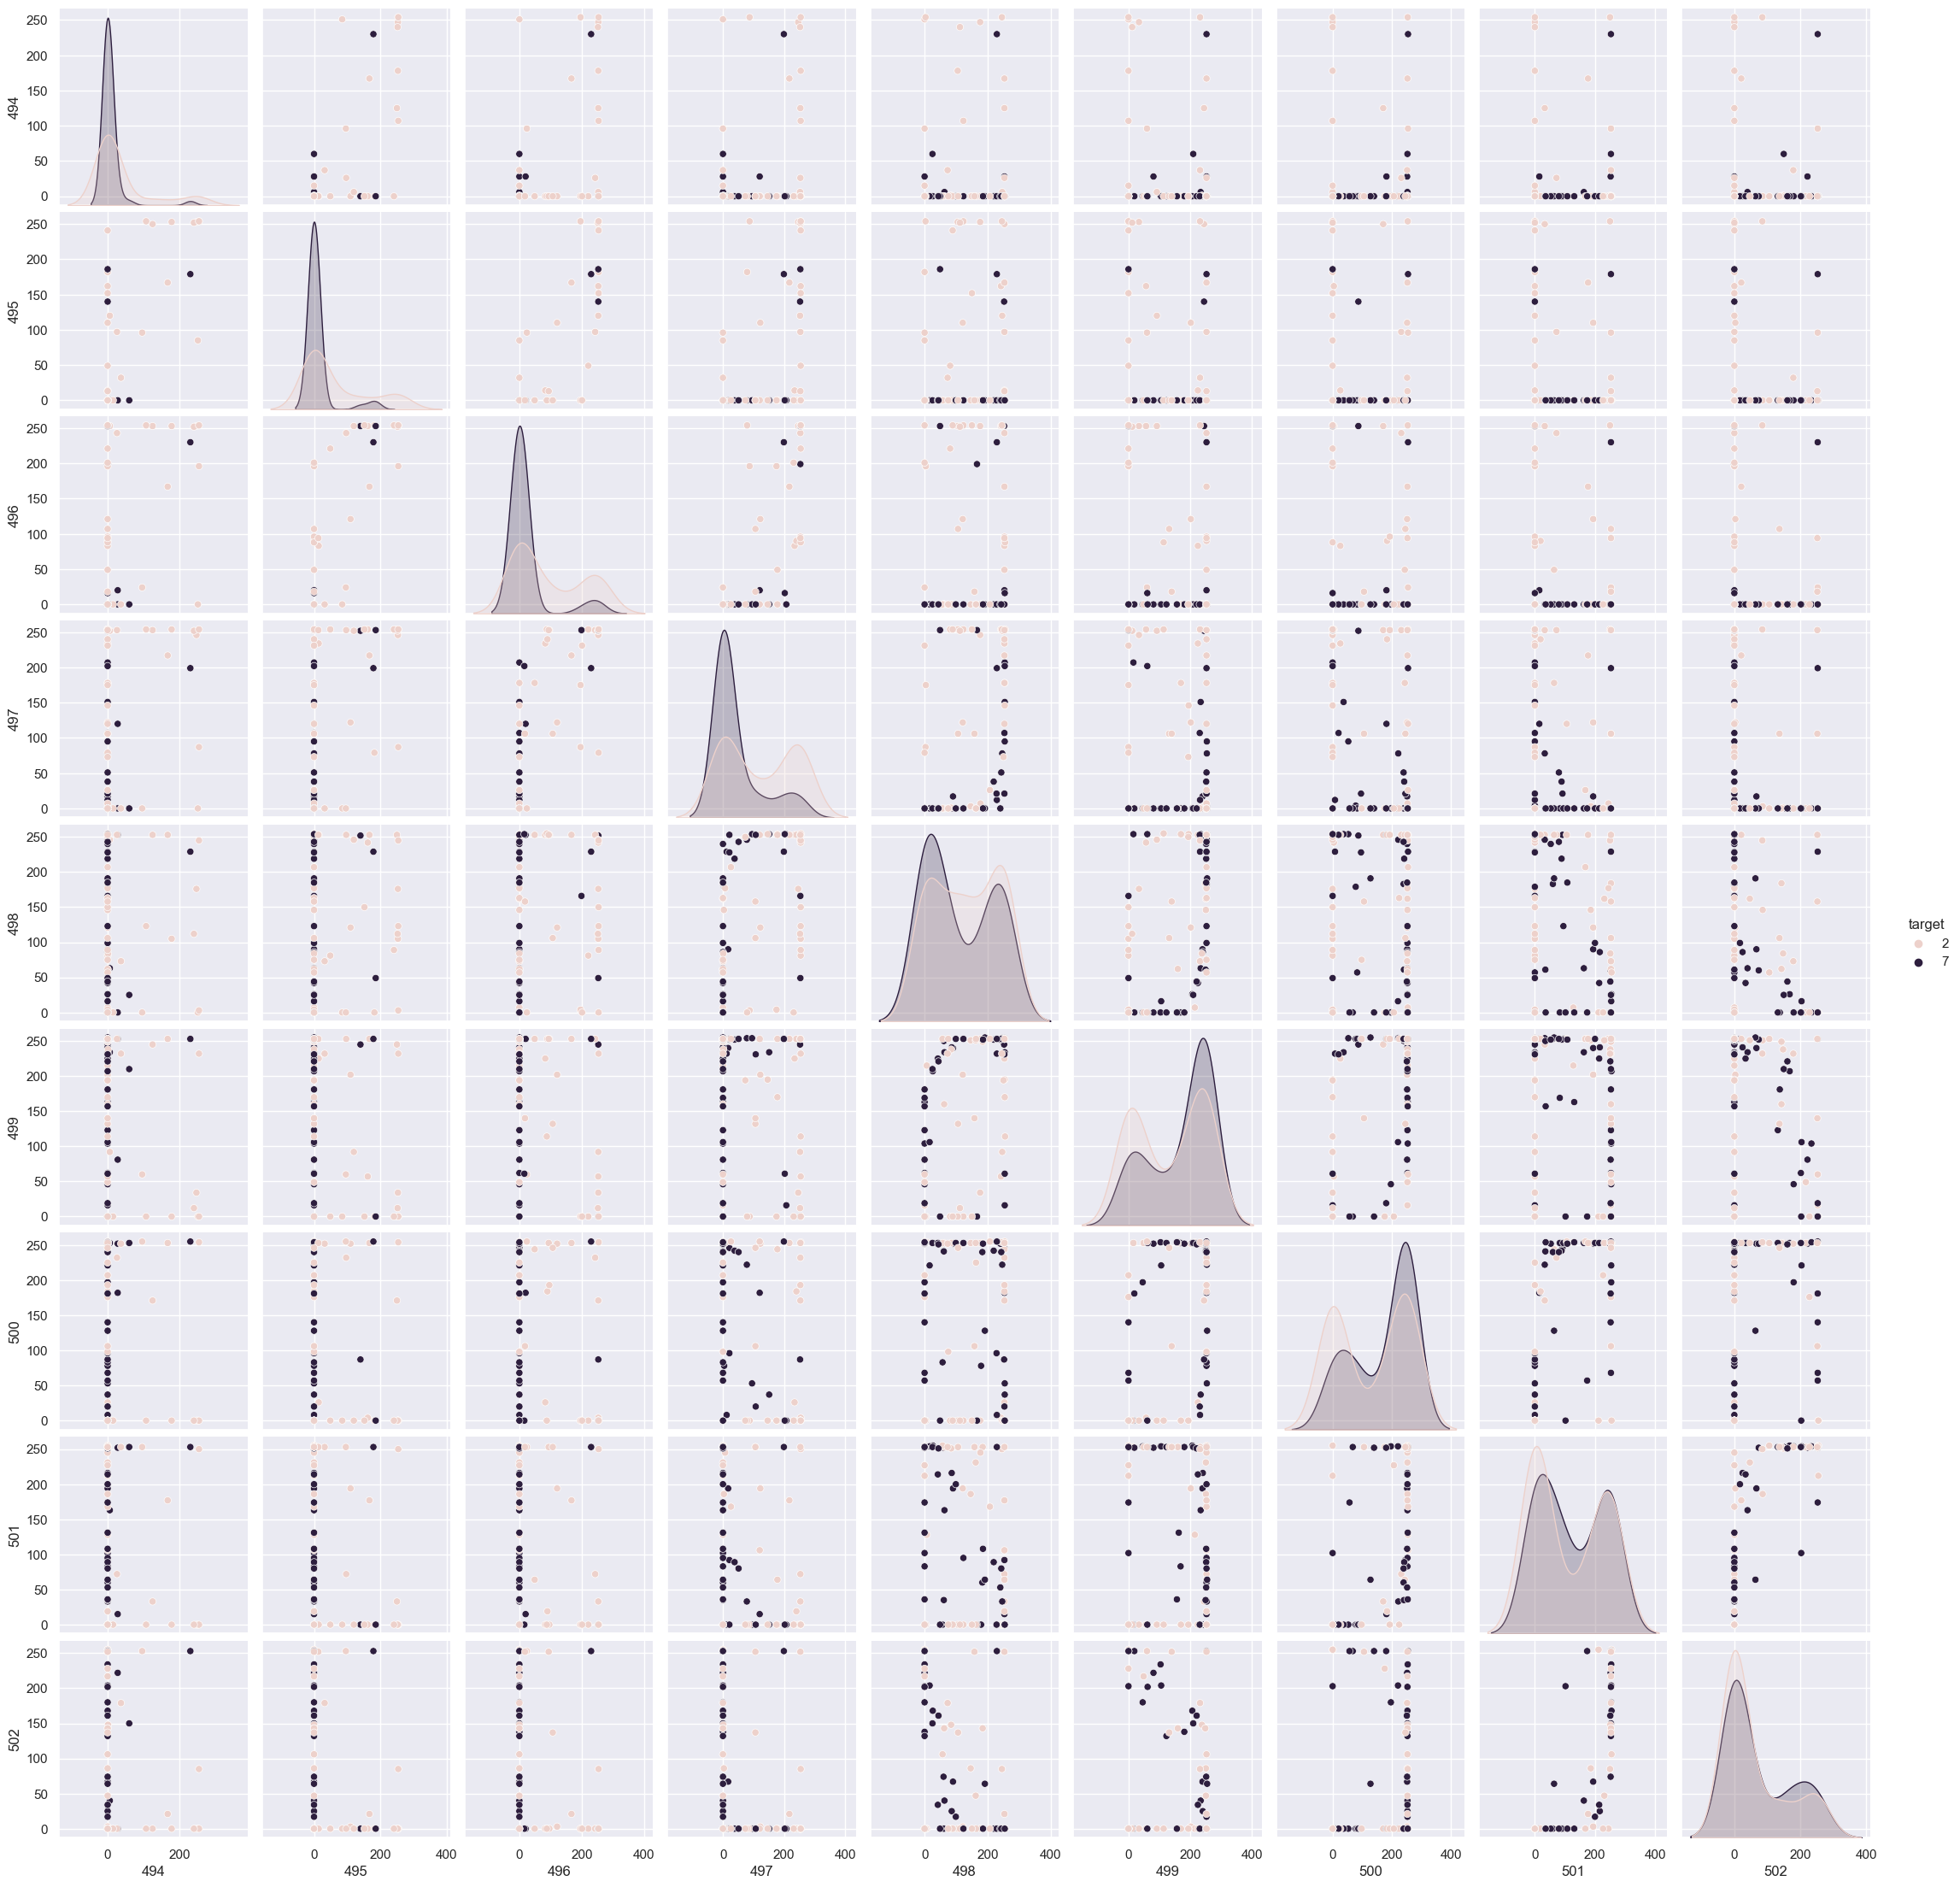

In [14]:
#we choose some features we expect to be meaningful
pair_plot = sns.pairplot(selected_targets[0:100], hue= 'target', diag_kind="kde", diag_kws=dict(fill=True))
plt.show()

In [15]:
df_desc= df_desc.drop(['target'])


KeyError: "['target'] not found in axis"

### Correlations

Use the previous pixel range but drop the `target` column.

Use directly a heatmap to display the correlations.

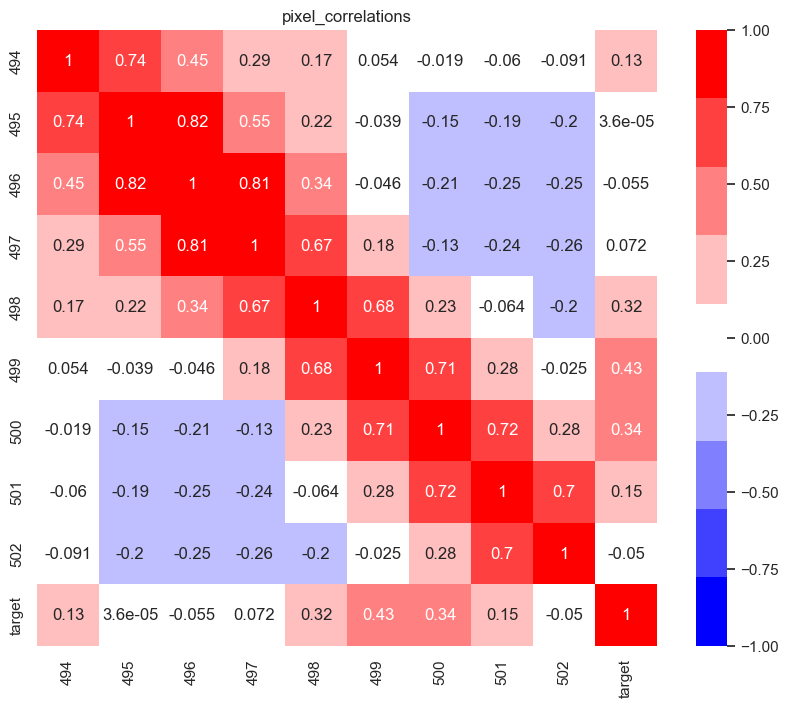

In [16]:
#display the correlations of the pixel range as a heatmap
#sns.heatmap(df_desc.corr())

n_colors = 9
cMap = plt.cm.get_cmap("bwr",lut=n_colors ) 

# define the heatmap
plt.figure( figsize=(10, 8))
plt.title('pixel_correlations')
h_map = sns.heatmap(df_desc.corr().values,
                    vmin=-1., vmax=1., 
                    cmap=cMap, 
                    annot=True, 
                    xticklabels=list(df_desc),
                    yticklabels=list(df_desc))
plt.xticks(rotation=90) 

# generate the heatmap
plt.show()


### Data Analysis Conclusions

Write down here a summary of your conclusions after the basic data analysis

# Classiffiers

We are going to build a $k$-NN and an MLP classifier **over the test dataset**.  
But before working with any classifier, we split first the test dataset into a train-validation and a test subset.  
Use for this the class `StratifiedShuffleSplit` from scikit-learn. Set the `test_size` parameter to either `0.5` or `0.75`.

### Splitting the test dataset

In [17]:
#split the test dataset here
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.5, random_state=0)
X = mnist['data']
y = mnist['target']


## k-NN Classification

> Girintili blok



### Grid Search of Optimal Number of neighbors

In [ ]:
#define a knn classifier and use CV to estimate the best number of neighbors
param_grid = {'n_neighbors': np.arange(1, 11)}

# Perform grid search and fit KNN model
knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grid=param_grid, cv=cv, scoring='accuracy')
grid_search.fit(X, y)

# Print best parameter and accuracy score
print("Best parameter: ", grid_search.best_params_)
print("Best accuracy score: ", grid_search.best_score_)


C:\Users\nawir\anaconda3_Machine_Lerning\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


### Search Results 

We first examine the test scores of the 5 best hyperparameters.

In [ ]:
#transfor the CV results into a DataFrame and display the 5 best results
cv_knn_df = pd.DataFrame()
cv_knn_df['Params'] = list(range(1,11))
cv_knn_df['Results'] = grid_search.cv_results_['mean_test_score']



In [ ]:
cv_knn_df

In [ ]:
#plot the test scores that correspond to each number of neighbors
sns.scatterplot(cv_knn_df, x = 'Params',y='Results')

We analyze the CV results to check whether the CV ranges used are correct.

### Test Accuracy and Confusion Matrix

Precision and recall can also be defined for multiclass problems but we will skip them.

In [ ]:
from sklearn import neighbors
#compute the test predictions, their accuracy and confusion matrix and discuss your results

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X,y)
pred = knn.predict(mnist['data_test'])
acc = accuracy_score(pred,mnist['target_test'])


In [ ]:
acc

In [ ]:
conf_matrix =confusion_matrix(mnist['target_test'], pred)

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=knn.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);


In [ ]:
fig, ax = plt.subplots(nrows=4,ncols=5, figsize=(12,9),)
target_test = mnist['target_test']

for i in range(4):
  rand_list = [random.randrange(0,len(mnist['data_test'])) for x in range(5)]

  ax[i,0].imshow(mnist['data_test'][rand_list[0]].reshape(32,32))
  ax[i,0].set_title(f'Pred: {pred[rand_list[0]]}, True: {target_test[rand_list[0]]}')

  ax[i,1].imshow(mnist['data_test'][rand_list[1]].reshape(32,32))
  ax[i,1].set_title(f'Pred: {pred[rand_list[1]]}, True: {target_test[rand_list[1]]}')

  ax[i,2].imshow(mnist['data_test'][rand_list[2]].reshape(32,32))
  ax[i,2].set_title(f'Pred: {pred[rand_list[2]]}, True: {target_test[rand_list[2]]}')

  ax[i,3].imshow(mnist['data_test'][rand_list[3]].reshape(32,32))
  ax[i,3].set_title(f'Pred: {pred[rand_list[3]]}, True: {target_test[rand_list[3]]}')

  ax[i,4].imshow(mnist['data_test'][rand_list[4]].reshape(32,32))
  ax[i,4].set_title(f'Pred: {pred[rand_list[4]]}, True: {target_test[rand_list[4]]}')

fig.tight_layout(pad=1.0)
for ax in fig.axes:
    ax.axis('off')

plt.show()


### Conclusions on the $k$-NN classifier

Discuss your results here

## MLP Classifier

### CV Hyperparametrization

Define an appropriate `MLPClassifier` and perform CV to select proper `alpha` and `hidden_layer_sizes` hyperparameters.

In [ ]:
#define an appropriate MLP classifier and perform CV to select proper alpha and hidden_layer_sizes


mlp_classifier = Pipeline(steps=[('std_sc', StandardScaler()),
                                 ('mlpc', MLPClassifier(solver='adam', 
                                                        activation='relu',
                                                        tol=1.e-4, 
                                                        max_iter=2000,
                                                        warm_start=False,
                                                        shuffle=True))])

l_hidden_layer_sizes = [(20,), (20, 20)]
l_alpha = [10.**k for k in range(-6, 4)]

param_grid = {'mlpc__alpha': l_alpha, 'mlpc__hidden_layer_sizes': l_hidden_layer_sizes}

mlpc_gscv = GridSearchCV(mlp_classifier, 
                         param_grid=param_grid, 
                         cv=cv, 
                         scoring='accuracy', 
                         return_train_score=True, 
                         n_jobs=-1, 
                         verbose=1)

t_0 = time.time() 
_ = mlpc_gscv.fit(X, y)
t_1 = time.time() 
print("\nmlp_grid_search_time: {0:.2}m".format((t_1 - t_0)/60.))

# saving alpha_search in a pickle    
joblib.dump(mlpc_gscv, 'mlp_classifier_gscv.joblib')

In [ ]:
mlpc_gscv.cv_results_

### Search Results 

We first examine the test scores of the 5 best hyperparameters.

In [ ]:
#transfor the CV results into a DataFrame and display the 5 best results
mlpc_gscv = joblib.load('mlp_classifier_gscv.joblib')
df_cv_estimator = pd.DataFrame.from_dict(mlpc_gscv.cv_results_)

display(df_cv_estimator[["param_mlpc__alpha", "param_mlpc__hidden_layer_sizes", "mean_test_score"]].sort_values(by="mean_test_score", ascending=False).head())

We analyze the CV results to check whether the CV ranges used are correct.

In [ ]:
#plot the test scores that correspond to each alpha; do this only for the best MLP architecture found
mlpc_gscv = joblib.load('mlp_classifier_gscv.joblib')

best_alpha = mlpc_gscv.best_params_['mlpc__alpha'] 
print("best alpha: %.6f\t" % best_alpha)
print("alpha_min: %f\talpha_max: %f" % (np.array(l_alpha).min(), np.array(l_alpha).max()))

best_hidden_layer_sizes = mlpc_gscv.best_params_['mlpc__hidden_layer_sizes'] 
print("best_hidden_layer_sizes", best_hidden_layer_sizes, "\nacc: %.3f" % mlpc_gscv.best_score_) 

idx_best_hidden_layer_sizes = [tup == best_hidden_layer_sizes for tup in df_cv_estimator['param_mlpc__hidden_layer_sizes'].values]
idx_best_hidden_layer_sizes = np.array(idx_best_hidden_layer_sizes)

plt.title("CV alpha vs accuracy")
plt.xscale('log')
plt.xlabel("alpha")
plt.ylabel("cv_accuracy")
_ = plt.plot( df_cv_estimator[idx_best_hidden_layer_sizes]['param_mlpc__alpha'], 
              df_cv_estimator[idx_best_hidden_layer_sizes]['mean_test_score'])

### Test MLPC Performance

We check the test accuracy and confusion matrix.

In [ ]:
#compute the test predictions, their accuracy and confusion matrix and discuss your results
### CV accuracy, recall and precision of best model

mlp_classifier = Pipeline(steps=[('std_sc', StandardScaler()),
                                 ('mlpc', MLPClassifier(solver='adam', 
                                                        activation='relu',
                                                        tol=1.e-4,
                                                        hidden_layer_sizes=(20,20),
                                                        alpha=1,
                                                        max_iter=2000,
                                                        warm_start=False,
                                                        shuffle=True))])
mlp_classifier.fit(X,y)


In [ ]:
pred = mlp_classifier.predict(mnist['data_test'])
acc = accuracy_score(pred,mnist['target_test'])
acc

In [ ]:
conf_matrix =confusion_matrix(mnist['target_test'], pred)

In [ ]:
fig, ax = plt.subplots(figsize=(8,6), dpi=100)

# initialize using the raw 2D confusion matrix 
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(conf_matrix, display_labels=mlp_classifier.classes_)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the Diabetes Detection Model')

# show the plot. 
# Pass the parameter ax to show customizations (ex. title) 
display.plot(ax=ax);


### Conclusions on the MLP classifier

Discuss your results here

### Predicting probabilities

We compute class probabilities over the test subset and pairplot them over the 10 classes.

In [ ]:
#compute the test prediction probabilities, and pairplot them here

test_data = mnist['data_test']
test_data
pred_probs = mlp_classifier.predict_proba(test_data)
pred_probs

In [ ]:
df_probs = pd.DataFrame(pred_probs)
df_probs['target'] = mnist['target_test']
df_probs

In [ ]:
sns.pairplot(data=df_probs, hue='target')
plt.show()


### Conclusions on the probability pairplots

Discuss the pairplot structure here

### What went wrong?

Probably your classification results are not very impressive.

As a first step to interpret them, find 10 cases of wrongly classified numbers, plot them and discuss your findings.  

In [ ]:
#find these examples and plot the images here
wrong_indices = np.where(pred != mnist['target_test'])[0]
select_indices = wrong_indices[:10]
fig, axs = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axs.flat):
    index = select_indices[i]
    image = mnist['data_test'][index].reshape(32, 32)
    true_label = mnist['target_test'][index]
    pred_label = pred[index]
    ax.imshow(image, cmap='gray')
    ax.set_title(f'True: {true_label}\nPred: {pred_label}')
    ax.axis('off')
plt.tight_layout()
plt.show()



## How to improve your results?

Recapitulate and discuss your results here and propose some ideas on how to improve them